# Performing image filtering with Convolutional Neural Networks

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from scipy import signal

from PIL import Image

* Before we start with the neural networks we are going to look at, let's see what a filter we apply to an image actually is.

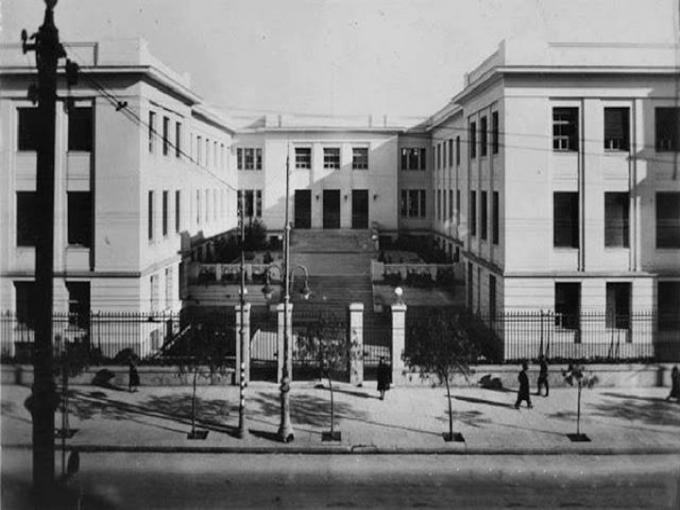

In [2]:
img = Image.open('aueb_1940_bw.jpg')

display(img)

* We will take the contents of the image as an array.

In [3]:
img_data = np.array(img)
img_data

array([[191, 189, 191, ..., 193, 172, 135],
       [199, 193, 188, ..., 192, 171, 134],
       [210, 197, 185, ..., 191, 170, 132],
       ...,
       [120,  80,  71, ...,  68,  65,  59],
       [123,  82,  73, ...,  68,  65,  59],
       [124,  83,  73, ...,  68,  65,  59]], dtype=uint8)

* We will convert them so that the array values ​​are between 0 and 1.

In [4]:
print(img_data.shape)
print(np.max(img_data))
img_data = img_data / np.max(img_data)

(510, 680)
239


* Here is what our image looks like now:

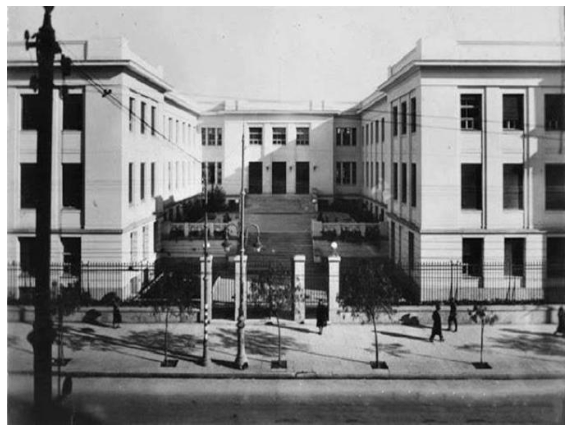

In [5]:
plt.figure(figsize=(10, 10))
plt.axis('off')
_ = plt.imshow(img_data, norm=matplotlib.colors.Normalize(0, 1), cmap='gray')

* A filter we apply to an image is just a table of numbers.

* We drag this table onto the image and at each point we calculate the sum of the products of the elements of the filter with the corresponding elements of the table of the contents of the image.

* This operation is called *convolution*.

* Next we see what happens if we apply a filter to the image which highlights the edges in our image.

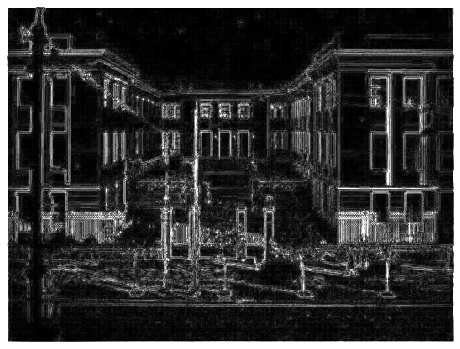

In [6]:
em = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])
edges = signal.convolve2d(img_data, em, boundary='fill', mode='same')
plt.figure(figsize=(8, 8))
plt.axis('off')
_ = plt.imshow(np.absolute(edges), norm=matplotlib.colors.Normalize(0, 1), cmap='gray')

* With other types of filters (tables) we can extract other types of features from an image.

* Therefore, to extract information from an image, we can search for the most appropriate filters to apply to it.

* What will these filters be?

* A neural network will find them for us.

* Until now we used neural networks in which all neurons were connected to the neurons of the previous layer.

* But this is not necessary.

* We can use an architecture that best suits the nature of our problem.

* One such architecture is Convolutional Neural Networks (CNNs), which have been particularly successful in image recognition applications.

* In a Convolutional Neural Network, the arrangement of neurons in the input layer corresponds to the dimensions of our images.

* Thus, if we have images of dimensions $28\times 28$, the neurons will be in a $28\times 28$ array.

* Next we will connect the neurons in the input layer to the neurons in the first hidden layer.

* We will not connect all input layer neurons to every hidden layer neuron.

* We will connect only the neurons of a small part of the image.

* For example, each neuron of the first hidden layer may be connected to a $5\times 5$ region of the original image.

* This area is called the *local receptive field* of the neuron.

* As we see we proceed from left to right, and also from top to bottom.

* In the example we advance one pixel at a time.

* This is not necessary.

* The number of pixels we advance each time is called a *stride*.

* Each neuron acts as a filter in its local sensory field.

* Why? Because it calculates the sum of the products of its weights (array) with its sensory field.

* To act as a filter on the whole image, it should somehow cover the whole image (like dragging the neuron over it).

* This is equivalent to all neurons in the layer *sharing* the same weights and biases.

* This is called *parameter sharing*.

* Furthermore, we don't need to have only one set of neurons acting as a filter in the layer.

* We can have more.

* This way, we can have a set of filters that we want to apply to the image.

* But what filters are these? What do they detect?

* We don't know in advance! This will emerge from the training process.

* In addition to convolutional layers, in Convolutional Neural Networks we also use *pooling layers*.

* A pooled layer reduces the size of the previous layer. In essence, it condenses it.

* For example, a neuron in the pooling layer can take a $2\times 2$ region of the previous layer and produce a value from them, such as the average or maximum value.

* We will follow the [TensorFlow example for image classification](https://www.tensorflow.org/tutorials/images/cnn).

* The dataset [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60,000 color images of dimensions $32 \times 32$.

* Images belong to 10 classes, with 6000 images per class.

* There are 50,000 training images and 10,000 test images.

In [7]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

* To get an idea of ​​what the images look like, we will take the first 25 of them.

* we will write a helper function for this purpose.

In [8]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

def display_cifar(rows, cols):

    plt.figure(figsize=(10,10))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
        plt.xlabel(class_names[train_labels[i][0]])

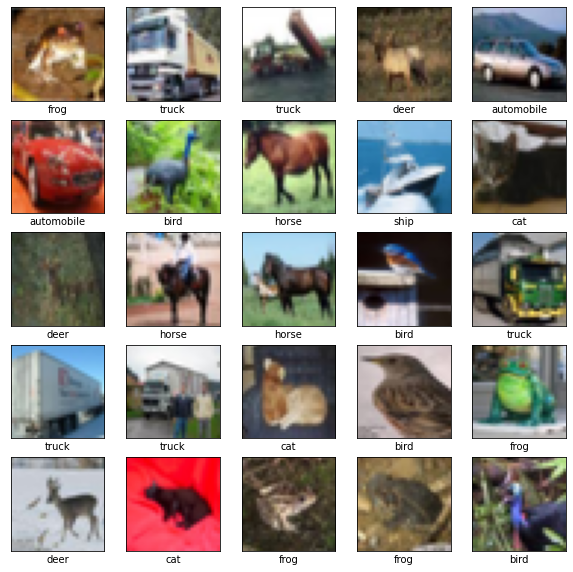

In [9]:
display_cifar(5, 5)

* We will make a convolutional base consisting of a series of `Conv2D` and `MaxPooling2D` layers.

* The input to the neural network will be $32 \times 32 \times 3$, since we have three colors.

* We'll have a `Rescaling' layer at the beginning, which will ensure that the values ​​in each image are between 0 and 1.

In [10]:
model = models.Sequential()
model.add(layers.Rescaling(1./255, input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

2022-03-17 16:43:20.381582: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


* Summarizing

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          3

* The first convolutional layer contains 32 filters, each of which is $3 \times 3$ in size. The output is `(30, 30, 32)`, since if we think about it a $3 \times 3$ filter fits 30 times horizontally and vertically into a $32 \times 32$ image.

* The `MaxPooling2D` layer will halve the dimensions, to `(15, 15, 32)`

* The second convolutional layer contains 64 filters, each of dimensions $3 \times 3$.

* So its output will be of dimensions `(13, 13, 64)`.

* The second layer `MaxPooling2D` will reduce the dimensions to `(6, 6, 64)`.

* The last convolutional layer will output `(4, 4, 64)`.

* Next we will convert `(4, 4, 64)` to a one-dimensional array of dimensions $4 \times 4 \times 64 = 1024$.

* We will pass the result through a dense layer with 64 neurons,

* In the end we will have a layer with 10 neurons, one for each class.

In [12]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          3

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, 
                    epochs=10, 
                    validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 35s 27ms/step - loss: 1.5524 - accuracy: 0.4327 - val_loss: 1.3427 - val_accuracy: 0.5133
Epoch 2/10
1250/1250 [==============================] - 47s 37ms/step - loss: 1.2012 - accuracy: 0.5730 - val_loss: 1.1604 - val_accuracy: 0.5966
Epoch 3/10
1250/1250 [==============================] - 49s 39ms/step - loss: 1.0524 - accuracy: 0.6296 - val_loss: 1.0828 - val_accuracy: 0.6156
Epoch 4/10
1250/1250 [==============================] - 47s 38ms/step - loss: 0.9553 - accuracy: 0.6626 - val_loss: 1.0297 - val_accuracy: 0.6439
Epoch 5/10
1250/1250 [==============================] - 49s 39ms/step - loss: 0.8825 - accuracy: 0.6903 - val_loss: 0.9414 - val_accuracy: 0.6711
Epoch 6/10
1250/1250 [==============================] - 49s 39ms/step - loss: 0.8168 - accuracy: 0.7145 - val_loss: 0.9681 - val_accuracy: 0.6616
Epoch 7/10
1250/1250 [==============================] - 45s 36ms/step - loss: 0.7650 - accuracy: 0.7314 - val_loss: 0.8741 -

* We will take the history to see how the network performance improves during training.

In [14]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,accuracy,val_loss,val_accuracy,epoch
0,1.552429,0.432750,1.342651,0.5133,0
1,1.201167,0.573025,1.160384,0.5966,1
2,1.052353,0.629650,1.082809,0.6156,2
3,0.955319,0.662625,1.029670,0.6439,3
4,0.882464,0.690325,0.941400,0.6711,4
5,0.816753,0.714475,0.968124,0.6616,5
6,0.764990,0.731350,0.874125,0.7028,6
7,0.721382,0.748475,0.906394,0.6888,7
8,0.680585,0.758850,0.892436,0.6985,8
9,0.636677,0.776400,0.895675,0.6970,9


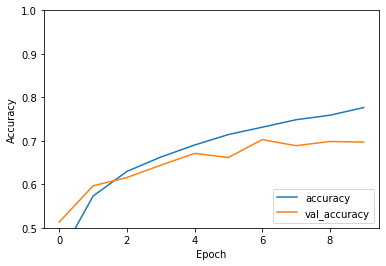

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

* Also we can see the network performance in the control data.

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('test loss:', test_loss, 'test accuracy:', test_acc)

313/313 - 6s - loss: 0.9068 - accuracy: 0.6978 - 6s/epoch - 19ms/step
test loss: 0.906847357749939 test accuracy: 0.6977999806404114
